# Introduction to Data Visualisation
## <font color='grey'>Part 2</font>
# Mapping data types to visual objects
### VMSG 2024
### Prof. Jamie Farquharson, Niigata University Japan. 

Email: jfarquharson@gs.niigata-u.ac.jp
Website:  https://jifarquharson.github.io/

***

# Outline
> ### $\S$1. Data and data types
> ### $\S$2. Plotting data
> ### $\S$3. Beyond the default
> ### $\S$4. Mapping data to chart types
> ### $\S$5. Figure fixer

### This is a Jupyter Notebook
A `Notebook` is a web application for creating and sharing *computational documents*. It is a very useful environment (often embedded within a   `JupyterLab` environment) for data science, scientific computing, and other applications. We will be using it to read and display data in a variety of formats. The `Notebook` is composed of two main *cell* types: `Markdown` and `Code`. `Markdown` cells contain formatted text. `Code` cells contain executable code, in this case written in `Python`.

`Code` cells can be executed individually by clicking &rarr;`Run`, or by pressing the `Shift` + `Return` keys. 

We can use `=` to assign a `value` to a `variable`. Let's try:

In [1]:
name = "" ### Enter your name between the " ", and run the cell.

Nothing obvious happens, but we can now use that `variable` in subsequent `cell` operations. Try running the next `cell`.

In [2]:
print('Hello {}! Welcome to VMSG 2024 '.format(name)+u'\U0001F30B')

Hello Jamie! Welcome to VMSG 2024 🌋


***
### A very quick introduction to functions
Often, we want to perform a similar operation many times, in which case it is sensible to write a `function`. A function usually takes some `inputs`, performs an operation, and gives some `outputs`. Here is a simple example:

In [3]:
def say_hello():
    response = input ("What is your name? ")
    print('\nHello {}! Welcome to VMSG 2024 '.format(str(response))+u'\U0001F30B')

This won't do anything until we call the function, like this:

In [4]:
say_hello()

What is your name? Jamie

Hello Jamie! Welcome to VMSG 2024 🌋


### Here's another function:

In [5]:
def yourNumber():
    seed = input("Please input an integer value from 0 to 4294967295: ")
    try:
        val = int(seed)
        try:
            assert 0 <= val <= 2**32 - 1
            print("\nYour number is {}".format(seed))
            return int(seed)
        except:
            print("Number out of range")
            yourNumber()
    except ValueError:
        print("That's not an integer")
        yourNumber()

### Now, please enter a number when prompted by `yourNumber()` ###

In [6]:
seed = yourNumber()

Please input an integer value from 0 to 4294967295: 129

Your number is 129


### Double-check your number, which is saved as a variable named `seed`:

In [7]:
seed

129

We can (and will) use this number later, at any time, until it is overwritten (i.e. if you were to assign another value to a variable with the name `seed`). Notice that `name` and `seed` are different types of data: a `string` and an `integer`, respectively.

### This is not a `Python` class, so we'll leave it there. When asked, please &rarr;`Run` the relevant `code` cells.
So that you don't have to, a series of `functions` have been written and stored in another `Notebook`. Run the following code so that we can access those functions later.

In [35]:
%run Functions.ipynb     # This is were some relevant functions are stored


***
# $\S$1. Data and data types

We can import data from an external file. For example, we have a `tsv` file containing data, called "DatasaurusDozen-wide.tsv," which we can read in to our `Notebook`. We'll read it in to a format called a `DataFrame`, and check the first few lines of the result.

In [9]:
data = pd.read_csv("The Datasaurus Dozen/DatasaurusDozen-wide.tsv", sep = "\t", header = 0,)
data = data.drop([0])
data = data.apply(pd.to_numeric).reset_index()

In [10]:
data.head()

,index,away,away.1,bullseye,bullseye.1,circle,circle.1,dino,dino.1,dots,...,slant_up,slant_up.1,star,star.1,v_lines,v_lines.1,wide_lines,wide_lines.1,x_shape,x_shape.1
0,1,32.331110,61.411101,51.203891,83.339777,55.993030,79.277264,55.3846,97.1795,51.147917,...,47.695201,95.241187,58.213608,91.881892,50.481508,93.222701,65.815540,95.588374,38.337757,92.472719
1,2,53.421463,26.186880,58.974470,85.499818,50.032254,79.013071,51.5385,96.0256,50.517126,...,44.609976,93.075835,58.196054,92.214989,50.282406,97.609984,65.672265,91.933402,35.751871,94.116768
2,3,63.920202,30.832194,51.872073,85.829738,51.288459,82.435940,46.1538,94.4872,50.207480,...,43.856381,94.085872,58.718231,90.310532,50.186703,99.694680,39.002716,92.261838,32.767218,88.518295
3,4,70.289506,82.533649,48.179931,85.045117,51.170537,79.165294,42.8205,91.4103,50.069482,...,41.578929,90.303567,57.278373,89.907607,50.326911,90.022053,37.795303,93.532455,33.729607,88.622266
4,5,34.118830,45.734551,41.683200,84.017941,44.377915,78.164628,40.7692,88.3333,50.562846,...,49.177419,96.610532,58.082020,92.008145,50.456207,89.987410,35.513901,89.599190,37.238249,83.724928


Now we can plot these data, if we want. Perhaps as **Histograms**:

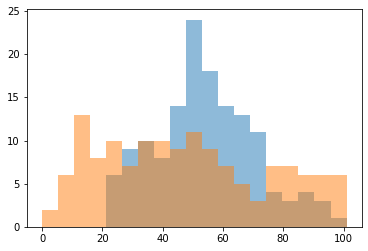

In [13]:
plt.hist(data['dino'],bins = np.linspace(0,101,20), alpha = 0.5)
plt.hist(data['dino.1'],bins = np.linspace(0,101,20),  alpha = 0.5)
plt.show()

Perhaps as a **line chart**:

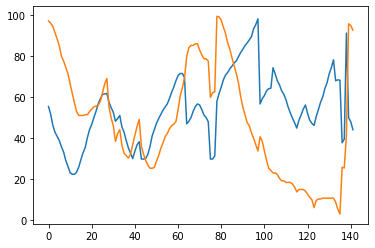

In [14]:
plt.plot(data['dino'])
plt.plot(data['dino.1'])
plt.show()

Or perhaps as a **scatterplot**:

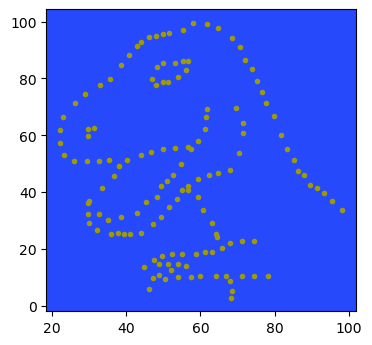

### Nice.

In [15]:
for i in range(20):
    fig=plt.figure(1, figsize=(4,4), frameon=True, dpi = 100)
    ax = fig.add_subplot(111)
    ax.set_facecolor(np.random.rand(3,).reshape(1,-1)[0])
    clear_output(wait=True)
    plt.scatter(data['dino'], data['dino.1'], marker=".",\
               c=np.random.rand(3,).reshape(1,-1))
    time.sleep(.5)
    plt.show()
display(Markdown('### Nice.'))

### Common types of data
There are many different kinds of data, and the kind of data visualisation we employ depends, partly, on the data type.

Here are some of the most common data types you may have to work with.

> `Categorical data`:

This type of data represents **categories** (labels) that cannot be measured numerically.

For example, types of phenocryst: quartz, feldspar, biotite.

> `Numerical data`:

This type of data represents _measurable quantities_ in **numerical** form. `Numerical data` can be **discrete** or **continuous**.

For example, 
- the number of volcanic eruptions in a specific region or over a certain time period (`discrete data`), or 
- the concentration of Cl in rhyolite (involves quantifiable measurements of `continuous data`).

> `Nominal data`:

This type of data represents **categories** (or labels) _without an inherent order_.

For example, eruption types: Surtseyan, Vulcanian, Strombolian, Hawaiian

> `Ordinal data`:

This type of data represents categories _with an inherent order_, but the intervals between categories are not uniform. 

For example, Volcanic Explosivity Index: VEI 0 (a non-explosive lava flow) $\rightarrow$ VEI 8 (VEI 8: a mega-colossal eruption).

> `Interval data`:

This type of data represents data that has a consistent **interval** (the difference between values), but _without a zero point_. 

For example, fumarole temperature measurements in °C: there is the same interval between -1 °C and 0 °C, and 0 °C and 1 °C. However, 0 °C does not mean an _absence_ of temperature.

> `Ratio data`:

This type of data is similar to `Interval data`, but _with a zero point_, such that zero means that the quantity being measured is absent.

For example, melt water content: there is the same interval between 2 wt.% and 1 wt.% as between 1 wt.% and 0 wt.%. However, 0 wt.% H$_2$O means there is no water, and we cannot observe negative values.

> `Discrete data`:

This type of data represents distinct (separate) values, where no intermediate values are possible.

For example, the number of historical eruptions from a given volcano. It could be 0, or 18, or 198, but it cannot be 17.9 or 18.1 (you cannot have 0.1 of an eruption).

> `Continuous data`:

This type of data has an infinite number of possible values (within a given range). 

For example, ground displacement due to magma chamber inflation. The value could be 10 mm, or 10.1 mm, or 10.01 mm, or 10.9823745610 mm...

> `Binary data`:

This type of data consists of only two possible values.

For example, 
- Is there an evacuation order in place? [Yes | No]
- This volcano is currently erupting [True | False]

> `Text data`:

This type of data represents **textual information** and is often **unstructured**.

For example, survey response data.

### Other relevant data

While the above are, generally speaking, the most common datatypes, there are others that you are likely to come across in volcano research.

These include:
> `Geospatial data`:

Data representing **geographic location** and/or characteristics of the spatial features on, above, or below the Earth's surface.

For example, an ash isopach map, sampling or drilling locations, SO$_2$ dispersal maps.

> `Temporal data`:

Also known as time-series data, this datatype represents information about time and temporal relationships.

For example, ground deformation in one location _over time_, precipitation in one location _over time_, volcano summit temperature _over time_.

> `Network data`:

This type of data represents **connections**, **communication**, or **relationships** between discrete entitites.

For example, retweets on Twitter*. The users are discrete entities, or _nodes_ in a network. Interactions such as retweets are connections, or _edges_ between those nodes.

> `Sensor data`:

This type of data represents information collected by **sensors** that measure physical or environmental conditions.

For example, output from seismometers, gas sensors, or thermal sensors.

Other datatypes that you might encounter are `Image data` (including satellite or drone imagery) and `Audio data`.

*$\mathbb{X}$, whatever


***
# $\S$2. Plotting data

### Dataset 1: Tilt

A _tiltmeter_ determines tiny changes in the angle of a slope (i.e. the _tilt_ of the ground), in order to monitor deformation caused by magma migrating in Earth's interior. Tiltmeters rely on a liquid level or pendulum.  We are going to use a function to generate some *synthetic* tilt data, using a `function` called `generate_tilt_data()`. The only input is your number from earlier.


In [16]:
t, tilt =  generate_tilt_data(seed)

The output here is two datasets, one called `t` and one called `tilt`. Take a look at some of the data: what **types** of data are they? What does `t` represent?

In [17]:
t[0:21] ## We will just look at the first 21 data points. To see them all, you can use the command `print(t)`

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  ])

In [18]:
tilt[0:21] ## We will just look at the first 21 data points. To see them all, you can use the command `print(t)`

array([0.08742377, 0.13383774, 0.11256639, 0.13554156, 0.13576993,
       0.14838378, 0.13741675, 0.12247284, 0.13673527, 0.14181223,
       0.1477848 , 0.17483942, 0.15702741, 0.19038748, 0.19442193,
       0.14133685, 0.14296829, 0.164303  , 0.19857088, 0.16905768,
       0.1642656 ])

### Dataset 2: TAS

Volcanic rocks are commonly discriminated according to their TAS: Total-alkali-silica classification. The alkali content is commonly Na$_2$O + K$_2$O, and the silica content is SiO$_2$. We are going to use a function to generate some *synthetic* TAS data, using a `function` called `generate_TAS_data()`. The only input is your number from earlier.

In [19]:
SiO2_values, TA_values = generate_TAS_data(seed)

The output here is two datasets, one called `SiO2_values` and one called `TA_values`. Take a look at some of the data: what **types** of data are they?

In [20]:
SiO2_values

array([71.35414924, 72.36471801, 71.94322897, 69.46617231, 74.68012721,
       69.88595709, 68.29768216, 71.63936333, 70.49956723, 68.06419001,
       69.7174398 , 71.47599558, 72.3818744 , 70.2694099 , 72.9746446 ,
       71.87421437, 68.52162786, 71.20356437])

In [21]:
TA_values

array([7.7056831 , 6.30832191, 6.81437878, 7.86761267, 6.22339446,
       7.28574269, 6.19154946, 6.46276046, 6.0080732 , 7.87163365,
       6.27877891, 7.78936917, 7.88219201, 7.04004592, 7.76906871,
       6.29858975, 7.91398023, 7.26036087])

### Dataset 3: Precipitation

It is often important to know about the environmental conditions of a volcano you are studying. Precipitation (i.e. rainfall) can be useful to know as it can affect things like satellite data completeness, instrument function, water table position, plume dispersal, site accessibility, and so on. We are going to use a function to generate some *synthetic* precipitation data, using a `function` called `generate_precipitation_data()`. The only input is your number from earlier.

In [30]:
mean_precip, months, years = generate_precipitation_data(seed)

The output here is three datasets, one called `mean_precip`, one called `months`, and one called `years`. Take a look at some of the data: what **types** of data are they? Is there anything you can spot from the data?

In [31]:
mean_precip

array([[46.85594311, 61.13895004, 56.18616782, 59.62757798, 55.07976894,
        52.31240111, 43.67930614, 35.42672438, 36.83650068, 38.67470177,
        43.10736545, 54.20477979],
       [54.14414032, 65.59912233, 67.467902  , 52.44597146, 48.85386557,
        48.92112719, 52.29661558, 41.14269899, 38.56639967, 38.71223783,
        51.18532537, 47.93546146],
       [53.12798741, 53.49740777, 60.64273579, 61.6488747 , 50.64271718,
        53.45426389, 41.1050121 , 39.59641866, 37.34678985, 38.36010307,
        40.63806848, 53.07748593],
       [56.11693547, 55.90668853, 58.34341799, 49.24869913, 54.53693406,
        42.09821965, 43.66673496, 42.57246762, 38.24083189, 41.22126367,
        39.93442534, 41.10514206],
       [51.3700714 , 51.64772751, 62.38004561, 57.33119079, 55.79519067,
        47.34129838, 43.41394971, 46.09244831, 38.93992955, 48.79761447,
        50.26603457, 48.7969835 ],
       [61.51254533, 51.30917801, 63.59351275, 53.45678667, 46.35391837,
        50.65652326, 4

In [32]:
months

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009']

In [33]:
years

['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

### Bar, Scatter, and Line charts
Bar charts, scatter plots, and line charts are three of the most commonly used types of graph. However, they are not equally appropriate for different datatypes.

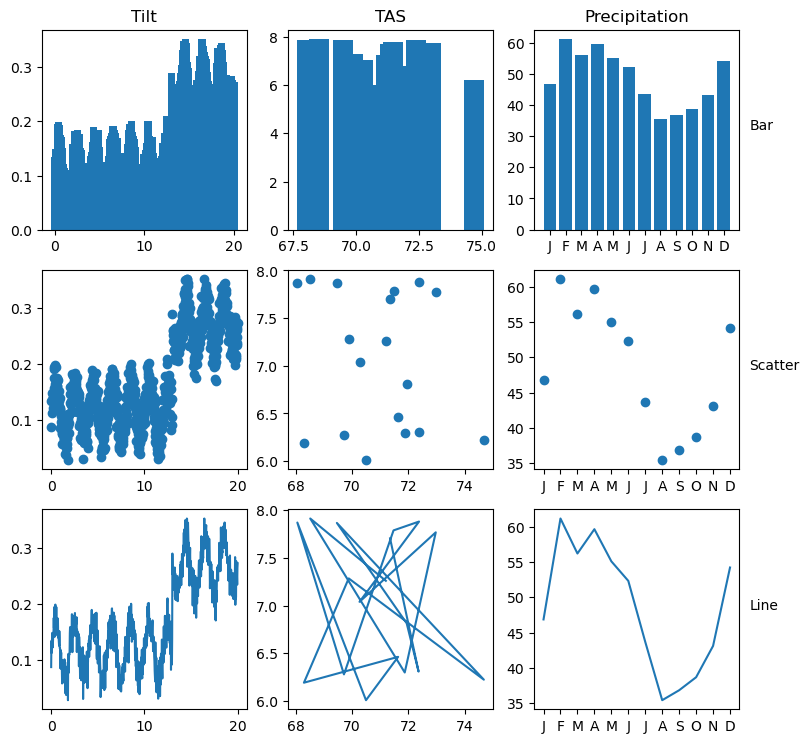

In [36]:
plot_three_charts(seed)

Which of the plots best showcases the different datatypes? Why are some appropriate but not others?

### Essential items

#### The default plots give us some information, but there is a lot missing! Some basic things we must include:

> `Data`

Sounds obvious, but you should include the _actual data points_, _lines_, _bars_, etc.

> `Labels`
- X-axis: what is the variable being represented on the **horizontal** axis?
- Y-axis: what is the variable being represented on the **vertical** axis?
- Z-axis?

> `Units`

Must be provided, where appropriate, for each axis.

> `Tick marks`

Tick marks on each axis help readers interpret data values. It also indicates whether axes are logged, linear, or something else.

> `Legend`

If there are multiple data series plotted, a legend should be included to distinguish between them.

> `Data source(s)`

Especially if some of the data were not collected by you (e.g. literature data).

> `Caption`

In a scientific context, you will need to provide a caption that describes the data, offering context or insights. This can be the place for title information, data sources, and information that would otherwise be annotations. 

### Optional extras

> `Gridlines`

Can be useful to guide the reader's eye.

> `Title`

A title describes the content, or purpose, of a graph. In a scientific context, this is often part of the `Caption`.


> `Annotations`

Additional **text** or **shapes** that provide explanations, highlight key points, or add context.


> `Colours` and `Styles`:

Colour and style (e.g. dashed or dotted lines) can be used to differentiate between data series, or to represent data directly (e.g. a colourbar to represent magnitude). Always be mindful of the use of colour and style in the context of accessibility. 


### Specific data visualisation types might require specific elements, such as a North arrow, a scale, error bars, and so on.


***
# $\S$3. Beyond the default

We will use our synthetic TAS data as an illustration.

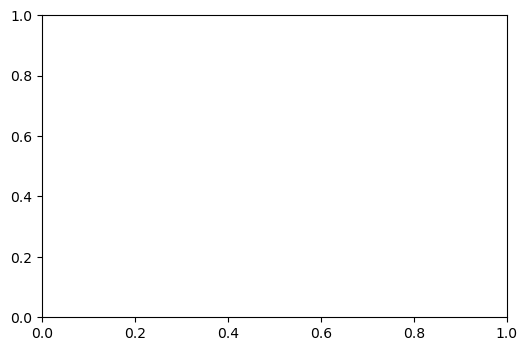

In [37]:
fig=plt.figure(1, figsize=(6,4), frameon=True, dpi = 100) ### We will plot a figure 6 x 4 inches
ax1 = fig.add_subplot(111) ### Initialise the axes


### Add the data

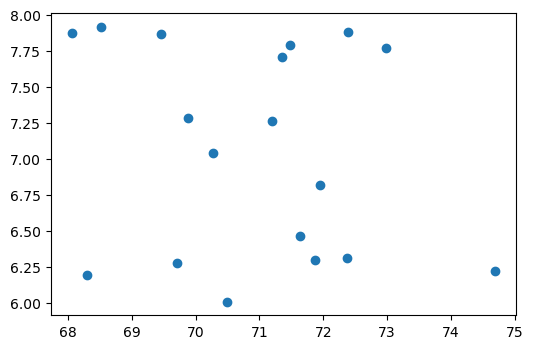

In [38]:
fig=plt.figure(1, figsize=(6,4), frameon=True, dpi = 100) ### We will plot a figure 6 x 4 inches
ax1 = fig.add_subplot(111) ### Initialise the axes

ax1.scatter(SiO2_values, TA_values)
plt.show()

### Add axes labels and units

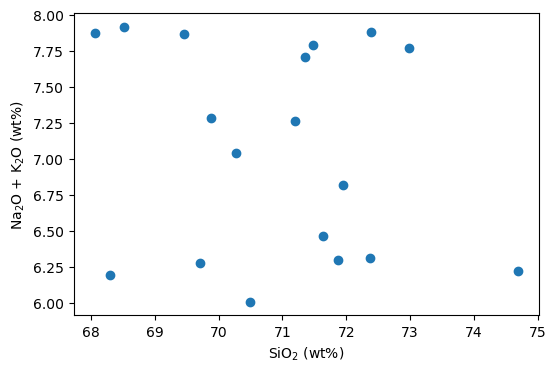

In [39]:
fig=plt.figure(1, figsize=(6,4), frameon=True, dpi = 100) ### We will plot a figure 6 x 4 inches
ax1 = fig.add_subplot(111) ### Initialise the axes

ax1.scatter(SiO2_values, TA_values) ### Plot the data

ax1.set_xlabel(r'SiO$_2$ (wt%)')   ### Set the x-axis label
ax1.set_ylabel(r'Na$_2$O + K$_2$O (wt%)')  ### Set the y-axis label
plt.show()

### Adjust the limits of the x- and y-axes, and add some context (annotations). 

The fields are from
> Le Maitre RW (2002) Igneous rocks : IUGS classification and glossary of
        terms : recommendations of the International Union of Geological 
        Sciences Subcommission on the Systematics of igneous rocks, 2nd ed. 
        Cambridge University Press, Cambridge
        
The function to plot them was written by John Stevenson and Joaquin Cortés.

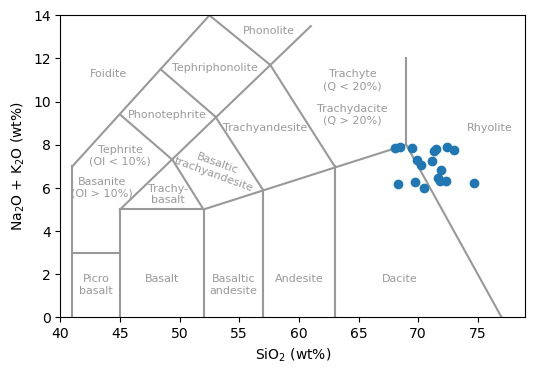

In [40]:
fig=plt.figure(1, figsize=(6,4), frameon=True, dpi = 100) ### We will plot a figure 6 x 4 inches
ax1 = fig.add_subplot(111) ### Initialise the axes

ax1.scatter(SiO2_values, TA_values) ### Plot the data

ax1.set_xlabel(r'SiO$_2$ (wt%)')  ### Set the x-axis label
ax1.set_ylabel(r'Na$_2$O + K$_2$O (wt%)')  ### Set the y-axis label

add_LeMaitre_fields(ax1)  # add TAS fields to the figure
 
ax1.set_ylim(0,14)   ### Set the y-axis limits appropriately
ax1.set_xlim(40, 79)   ### Set the x-axis limits appropriately
plt.show()

### Modify markers, add a legend, and include the caption

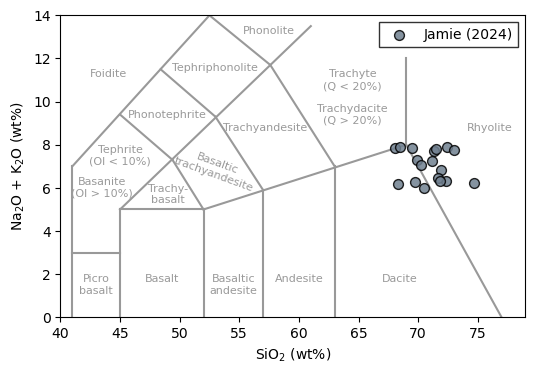

**Figure 1**: Na$_2$O + K$_2$O versus SiO$_2$ (wt%) 
                 for new data collected in this study (Jamie 2024). 
                 TAS fields from Le Maitre et al. (2002) are presented for context.

In [41]:
fig=plt.figure(1, figsize=(6,4), frameon=True, dpi = 100) ### We will plot a figure 6 x 4 inches
ax1 = fig.add_subplot(111) ### Initialise the axes

ax1.scatter(SiO2_values, TA_values, label = "{} (2024)".format(name), s = 50, marker = "o",
            ec="k",color = "slategrey", alpha = 0.85) ### Plot the data

ax1.set_xlabel(r'SiO$_2$ (wt%)')  ### Set the x-axis label
ax1.set_ylabel(r'Na$_2$O + K$_2$O (wt%)')  ### Set the y-axis label

add_LeMaitre_fields(ax1)  # add TAS fields to the figure
 
ax1.set_ylim(0,14)   ### Set the y-axis limits appropriately
ax1.set_xlim(40, 79)   ### Set the x-axis limits appropriately
ax1.legend(loc='upper right', numpoints=1, edgecolor = "k", fancybox =False)
plt.show()
display(Markdown('''**Figure 1**: Na$_2$O + K$_2$O versus SiO$_2$ (wt%) 
                 for new data collected in this study ({} 2024). 
                 TAS fields from Le Maitre et al. (2002) are presented for context.'''.format(name)))


***
# $\S$4. Mapping data to chart types

If have a dataset and try to plot it indiscriminately, we will run into trouble, as not all data visualisations are appropriate for all kinds of data. The function `chart_picker()` is a tool that can give an idea of which kind of chart to use, depending on what we want to show. Try a few options below (you will need to reset the function each time it gives an output).

In [42]:
chart_picker(seed)

Button(description='Reset selection', layout=Layout(visibility='visible'), style=ButtonStyle())

Dropdown(description='Select', options=('Comparison', 'Distribution', 'Relationship', 'Composition'), value=No…

Output()

Based on the following research scenarios, think about what *kind* of data visualisation might be the best option.

***
### Scenario 1:

Author 1 collected density measurements of pyroclastic ejecta (**numerical**, **ratio** data). They want to show the *distribution* of these data over a finite range. They have relatively few data (~200 data points). What kind of data visualisation should Author 1 use? Try using the `chart_picker`, then click to reveal the answer.


In [43]:
chart_picker(seed)

Button(description='Reset selection', layout=Layout(visibility='visible'), style=ButtonStyle())

Dropdown(description='Select', options=('Comparison', 'Distribution', 'Relationship', 'Composition'), value=No…

Output()

In [44]:
display(scenario_1_button)

Button(description='Click for answer', icon='eye', style=ButtonStyle(), tooltip='Button')

Check out this example of a (bar) histogram from Watts et al. (2023).<br><br>
                     Watts, E.J., Cockshell, W.A. & Houghton, B.F. "Characterising the wind-advected medial fall deposit from fissure 8 fountaining during the 2018 lower East Rift Zone eruption, Kīlauea." *Bull. Volcanol. 85*, 51 (2023). https://doi.org/10.1007/s00445-023-01668-7

**Figure 3**: Distribution of density within the pyroclasts from the medial deposit (light blue) and the Ahuʻailāʻau cone (dark blue). Mean for each deposit is shown by the dashed and dot-dashed lines respectively.

<div class="alert alert-block alert-success">This is also a great option for 
    comparing two sets of pyroclasts ("medial deposits" and "cone"), as we can easily see the different characteristics
    (e.g. range, mode) of the two datasets. Because vesicularity scales inversely with density, this 
    has been added as a second x axis. Because the y axis shows *percentage* of clasts, the two datasets can be 
    compared even though there are different numbers of samples (167 and 200).</div>

***
### Scenario 2:

Author 2 has a breakdown of contributions of different groups&mdash;such as volcanologists, economists, and politicians&mdash;to quotes given in newspaper articles about the Eyjafjallajökull ash cloud. How could Author 2 show the composition of quotes given to each news source as a share of the total contribution?  Try using the `chart_picker`, then click to reveal the answer.


In [ ]:
chart_picker(seed)

In [45]:
display(scenario_2_button)

Button(description='Click for answer', icon='eye', style=ButtonStyle(), tooltip='Button')

Check out this example of a pie chart from Harris et al. (2012).<br><br>                   
                     Harris, A. J. L., Gurioli, L., Hughes, E. H., and Lagreulet, S. "Impact of the Eyjafjallajökull ash cloud: A newspaper perspective."" *J. Geophys. Res. 117*, B9 (2012). https://doi.org/10.1029/2011JB008735

**Figure 6**: Pie charts showing the relative contributions of each group to all quotes given in the newspaper, as well as those for just the main report, in (a) USA Today, (b) The Times, (c) The Sun, (d) Le Figaro, (e) Corriere della Sera, and (f) La Repubblica.

<div class="alert alert-block alert-success">Note that by using the same colour pattern between separate
     pie charts, the reader can compare the relative contribution of, for example, volcanologists to USA Today or The Sun. 
     As such, we can look at relative contributions within *and* between charts. However, one should always be careful relying on colour (alone) to differentiate between categories.</div>

***
### Scenario 3:

Author 3 has major element composition of matrix glass from pyroclast samples. For each sample, Author 3 has data pairs corresponding to a weight % of a given major oxide proportion, and the weight % of SiO<sub>2</sub>. How would Author 3 best visualise the distribution of and/or relationship between these two sets of variables? Try using the `chart_picker`, then click to reveal the answer.


In [ ]:
chart_picker(seed)

In [1]:
display(scenario_3_button)

NameError: name 'scenario_3_button' is not defined

***
### Scenario 4

Author 4 has data that breaks down whether volcanological publications (a) are led by local researchers, (b) include (but aren't led by) local researchers, or (c) do not include local researchers. The composition of these data change over time, but the annual data are only available over a 30-year timeframe. How would Author 4 best show the relative *and* absolute differences between these data? Try using the `chart_picker`, then click to reveal the answer.

In [ ]:
chart_picker(seed)

In [47]:
display(scenario_4_button)

Button(description='Click for answer', icon='eye', style=ButtonStyle(), tooltip='Button')

Check out this example of a stacked and normalised stacked column charts from Lerner et al. (2023).<br><br>
    Lerner, G. A., Williams, G. T., Meredith, E. S., Jenkins, S. F. and Barclay, J. "How inclusive is volcanology? Insights from global bibliometric analyses" *Volcanica, 6*(1), pp. 77–94. doi: 10.30909/vol.06.01.7794.


**Figure 2**: Total volcano-naming articles published over time, split into three categories: led by local author, local co-author(s) included (but not leading), and including no local co-authors. [A] is the number of articles per year and [B] is the percentage in each category.

<div class="alert alert-block alert-success">Comparing these two visualisations side by side makes it clear that the number of articles in their catalogue increases substantially over the time period 1990&ndash;2021 [A]; however, the relative difference between the different categories remains (relatively) consistent [B]. Note that the colours have been chosen such that they  are still distinguishable in greyscale and accessible to those with colour vision deficiencies.</div>

***
### Scenario 5

Author 5 has a time series of the total mass output of SO<sub>2</sub> during the 2021 eruption of La Soufrière, St Vincent. Author 5 wants to show the contribution of tropospheric and stratospheric SO<sub>2</sub> to the total mass loading (i.e. the composition of the summed data). They have relatively high temporal resolution, so there are many time periods. They are interested in the absolute differences between the different contributors. How could the author visualise these data?  Try using the `chart_picker`, then click to reveal the answer.

In [ ]:
chart_picker(seed)

Button(description='Click for answer', icon='eye', style=ButtonStyle(), tooltip='Button')

Check out this example of a stacked area chart from Taylor et al. (2023).<br><br>
    Taylor, I. A., Grainger, R. G., Prata, A. T., Proud, S. R., Mather, T. A., and Pyle, D. M. "A satellite chronology of plumes from the April 2021 eruption of La Soufrière, St Vincent" *Atmos. Chem. Phys. 23* (2023), https://doi.org/10.5194/acp-23-15209-2023.

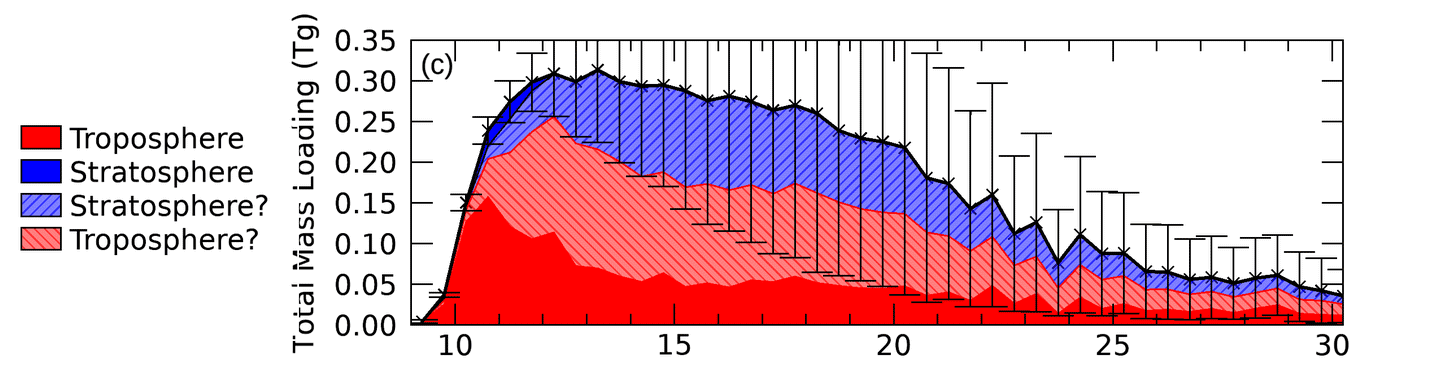

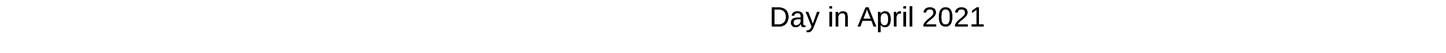

**Figure 9**: Summary of the IASI SO<sub>2</sub> results generated from iterative retrieval outputs for 9 to 30 April 2021. [...] (c) Time series of the total mass of SO<sub>2</sub> with errors. Using the retrieved SO<sub>2</sub> heights and the tropopause heights, this has been divided into tropospheric and stratospheric SO<sub>2</sub>. The height errors have also been used to create two more categories: heights that are stratospheric but given the height error could be tropospheric and heights that are tropospheric but could be stratospheric. [...]

<div class="alert alert-block alert-success">Here, the author visualises the total mass loading with a solid black line. Rather than leave it as a simple line chart, they have included the breakdown of contributions to the  total mass loading, which also evolves over time. Note that the authors don’t rely solely on colour to differentiate categories: they also use variable hatching. Uncertainties are also visualised using error bars. </div>

In [48]:
display(scenario_5_button)

***
### Scenario 6

Author 6 has a continuous timeseries of average δ<sup>18</sup>O values from the North Greenland Ice Core Project (NGRIP). The author wants to show if and how this variable changes over a very long time. How best could they visualise these data? Try using the `chart_picker`, then click to reveal the answer.

In [ ]:
chart_picker(seed)

In [49]:
display(scenario_6_button)

Button(description='Click for answer', icon='eye', style=ButtonStyle(), tooltip='Button')

Check out this example of a line charts from Paine et al. (2021).<br><br>
    Paine, A.R., Wadsworth, F.B. & Baldini, J.U.L. "Supereruption doublet at a climate transition" *Commun. Earth Environ. 2*, 219 (2021). https://doi.org/10.1038/s43247-021-00293-6

**Figure 1**: **Timing of known eruptions exceeding magnitude 7, relative to the Greenland δ<sup>18</sup>O record.** 
                     50-year averaged δ<sup>18</sup>O values from the North Greenland Ice Core Project (NGRIP) on the Greenland Ice Core Chronology 2005 (GICC05) model-based extension time scale,
                     with stadials corresponding to cooler temperatures (more negative δ<sup>18</sup>O) as blue shaded periods<sup>[2]</sup>.
                     Known very large eruptions are shown as red (7 < M < 8) and black (M > 8) bars, and stars represent radiometric eruption dates.
                     Inset: A comparison of Toba and Atitlán eruption dates, with 1σ errors shown (black bars)<sup>[1,9]</sup> relative to the timing of Greenland Stadial
                     20 and bipolar sulfate anomalies (T1-T9; purple points) measured in the NGRIP and EDML ice core<sup>[12]</sup>.
                     

<div class="alert alert-block alert-success">This is a great example of the use of a baseline dataset (i.e. the NGRIP δ<sup>18</sup>O) for comparing discrete time-resolved data against (in this case, large-magnitude eruptions and glacial stadials). It also serves as context for their zoomed inset plot, which looks at a period of only 6 ka. Annotations are used sparingly, but effectively.</div>

***
***
# $\S$5. Figure Fixer

In this final section, you will generate and plot some data. You will then have a go at stylising the graph by tweaking lots of parameters.

A few extra `Python` things to know about before moving forward:

 - __`**kwargs`__ are additional `key`word `arg`ument`s` for customising plots. Some examples of things you can change include the __marker sizes__, the __axes thickness__, or the __spacing__ between subplots.

- __`*args`__ are `dict`ionaries containing additional `kwargs`.

- there are many different elements to a `matplotlib` figure. Running the next function will help familiarise you with some of them:



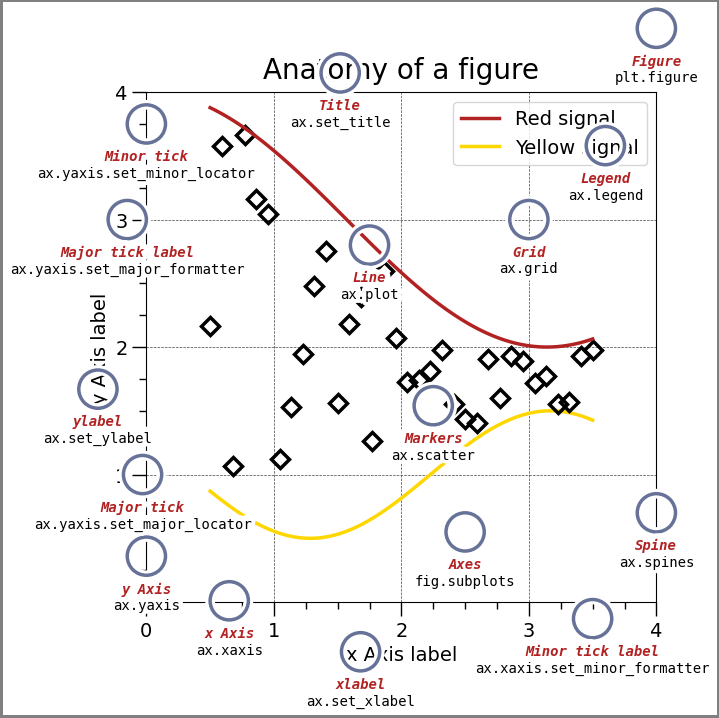

In [50]:
plot_anatomy_figure(seed)

This generates the data:

In [51]:
DATA = generate_data(seed=seed)
DATA.head()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,pY3,pY4
0,70.368518,3499.433946,47.467351,361.581262,1.594853,8.947882,1.422307,25.556592,3.669161,2.827999
1,70.443882,1955.197480,49.159149,261.861677,1.825953,45.418511,4.582700,14.795187,4.374885,23.233240
2,71.697128,2662.337612,49.443586,428.289414,3.115606,146.886788,6.095581,107.277173,8.762646,38.825629
3,71.781807,2645.651669,53.352069,386.461490,6.935350,121.782628,6.195049,67.192815,24.798130,39.973466
4,71.947848,3855.733821,54.388798,294.718601,8.284987,32.879483,6.210116,25.223846,31.247074,40.148629


There are several named colours available in `matplotlib` (the package we are using to visualise our data), as well as the capacity to define or import colours and colourmaps. The following code will print out all the available named colours, which might be useful.


In [52]:
named_colours = list(
    mcolors.TABLEAU_COLORS.keys()) + list(
    mcolors.BASE_COLORS.keys()) + list(
    mcolors.CSS4_COLORS.keys())
print(named_colours)

['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen',

The cell below contains a series of `dict`ionaries, which are just a way in which `Python` can store data, as `{key:value}` pairs. They are called:
- `S1_kwargs`, which stores general parameter values for the first subplot (subplot 1);
- `S2_kwargs`, which stores general parameter values for the second subplot (subplot 2);
- `S1_D1`, which stores parameter values for the 1st dataset on subplot 1;
- `S1_D2`, which stores parameter values for the 2nd dataset on subplot 1;
- `S2_D1`, which stores parameter values for the 1st dataset on subplot 2;
- `S2_D2`, which stores parameter values for the 2nd dataset on subplot 2;
- `S2_D3`, which stores parameter values for the 3rd dataset on subplot 2; and
- `S2_D4`, which stores parameter values for the 4th dataset on subplot 2.

You can modify parameters within each `dict`, or toggle them on and off (by typing a `#` at the start of the relevant line). If the parameter is a `string`, then type between the `"` `"`. Otherwise, if the parameter is a `float` or `int`eger (i.e. a numerical value), just change the value.

You can also adjust `plt.rcParams['font.family']` to equal one of five named options. 
There are also a handful of other options you can change, either as a binary `True|False` option, or by setting a value (such as `horizontal_spacing`). I've been very helpful and set some of the values already. Your task is to produce an effective piece of data visualisation by fine-tuning the plot parameters. 

Alright, now go ahead and run the next cell.

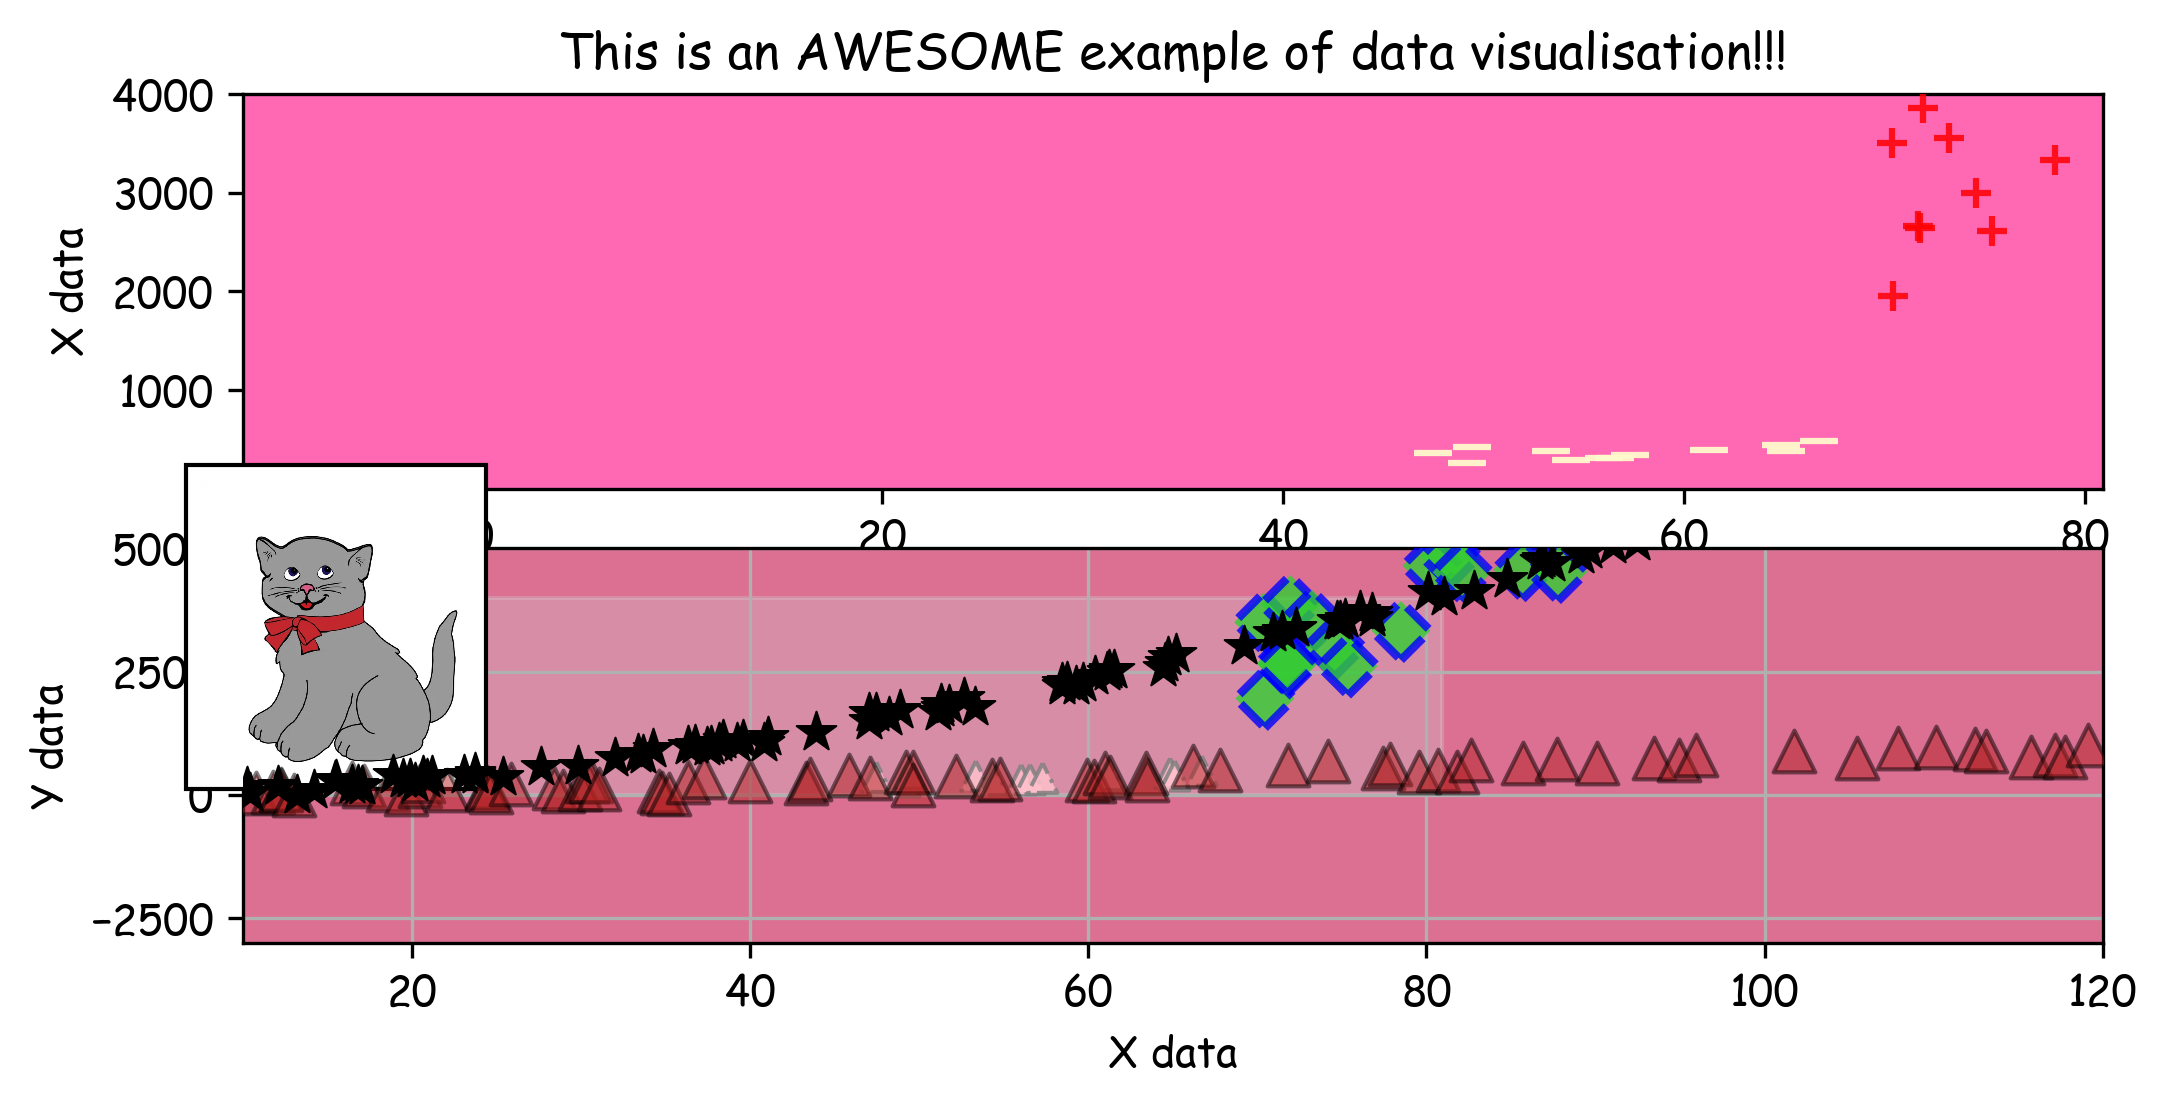

<div class="alert alert-block alert-success">This might take quite a few iterations to reach "publication quality". Remember that there is no single perfect look and layout for a figure (but there are plenty of wrong ones)! If you are happy with what you've come up with, feel free to email your version to jfarquharson@gs.niigata-u.ac.jp, with the subject line: [VMSG 2024 data visualisation] [Your Name] [Awesome]. You can right-click on the image to copy or save.</div>

In [62]:

'''
############################################
##  You can adjust the font family here.  ##
############################################
'''

            # This controls the typeface used on the graph.

plt.rcParams['font.family'] = "fantasy" ## "fantasy", "monospace", "cursive", "serif", "sans-serif"

'''
##########################################################################
##  Subplot 1 kwargs. These control parameters for the second subplot.  ##
##########################################################################
'''
S1_kwargs = {
            # This controls the label on the x axis.
    "xlabel": ["Y data"],
            # This controls the label on the y axis.
    "ylabel": ["X data"],
            # This controls whether there is a grid.
    "grid": ["on"],
            # This controls whether the x axis is logged ["log"] or ["linear"].
    "xscale": ["linear"],
            # This controls whether the x axis is logged ["log"] or ["linear"].
    "yscale": ["linear"],
            # This controls the upper and lower limits of the x axis.
    "xlim": [(-11.9, 80.9)],
            # This controls the upper and lower limits of the x axis.
    "ylim": [(1, 4000)], 
            # This controls whether there is a title, and what it says
    "title" : ["This is an AWESOME example of data visualisation!!!"],
            # This controls the colour of the subplot background.
    "facecolor" : ["hotpink"],
}

'''
##########################################################################
##  Subplot 2 kwargs. These control parameters for the second subplot.  ##
##########################################################################
'''
S2_kwargs = {
            # This controls the label on the x axis.
    "xlabel": ["X data"],
            # This controls the label on the y axis.
    "ylabel": ["Y data"],
            # This controls whether there is a grid.
    "grid": ["on"],
            # This controls whether the x axis is logged ["log"] or ["linear"].
    "xscale": ["linear"],
            # This controls whether the x axis is logged ["log"] or ["linear"].
    "yscale": ["linear"],
            # This controls the upper and lower limits of the x axis.
    "xlim": [(10,120)],
            # This controls the upper and lower limits of the x axis.
    "ylim": [(-3000, 5001)], 
            # This controls whether there is a title, and what it says.
#     "title" : ["Title"],
            # This controls the colour of the subplot background.
    "facecolor" : ["oldlace"],
}


'''
###############################################################################################
##  Dataset 1 kwargs. These control parameters for the first set of (x,y) data (subplot 1).  ##
###############################################################################################
'''
S1_D1 = {
            # This controls the marker size (scalar value or an array of the same length as the dataset).
    "s": 50,
            # This controls the marker colour (see options above).
    "color": "red",
            # This controls the marker line colour (see options above).
    "edgecolors": "k",
            # This controls the marker shape (options include: 's', 'o', '.', ',', '*', '^', 'v', 'p').
    "marker": "+",
            # This controls the layer order of items on the plot.
    "zorder": 10,
            # This controls the transparency of markers on the plot (values between 0.0 and 1.0).
    "alpha": 0.85,
            # This controls the thickness of lines, including the marker edges.
    "linewidths": 0.25,
            # This controls the style of lines, including the marker edges ("-", ":", "--", ".-").
    "linestyle": "-", 
            # This controls whether there is a legend entry, and what it says.
    "label": "",
        }

'''
###############################################################################################
##  Dataset 2 kwargs. These control parameters for the first set of (x,y) data (subplot 1).  ##
###############################################################################################
'''
S1_D2 = {
            # This controls the marker size (scalar value or an array of the same length as the dataset).
    "s": 80,
            # This controls the marker colour (see options above).
    "color": "lemonchiffon",
            # This controls the marker line colour (see options above).
    "edgecolors": "r",
            # This controls the marker shape (options include: 's', 'o', '.', ',', '*', '^', 'v', 'p').
    "marker": "_",
            # This controls the layer order of items on the plot.
    "zorder": 2,
            # This controls the transparency of markers on the plot (values between 0.0 and 1.0).
    "alpha": 0.95,
            # This controls the thickness of lines, including the marker edges.
    "linewidths": 0.95,
            # This controls the style of lines, including the marker edges ("-", ":", "--", ".-").
    "linestyle": "-", 
            # This controls whether there is a legend entry, and what it says.
    "label": "",
        }

'''
###############################################################################################
##  Dataset 1 kwargs. These control parameters for the first set of (x,y) data (subplot 2).  ##
###############################################################################################
'''
S2_D1 = {
            # This controls the marker size (scalar value or an array of the same length as the dataset).
    "s": 100,
            # This controls the marker colour (see options above).
    "color": "limegreen",
            # This controls the marker line colour (see options above).
    "edgecolors": "blue",
            # This controls the marker shape (options include: 's', 'o', '.', ',', '*', '^', 'v', 'p').
    "marker": "D",
            # This controls the layer order of items on the plot.
    "zorder": 10,
            # This controls the transparency of markers on the plot (values between 0.0 and 1.0).
    "alpha": 0.8,
            # This controls the thickness of lines, including the marker edges.
    "linewidths": 2,
            # This controls the style of lines, including the marker edges ("-", ":", "--", ".-").
    "linestyle": "--", 
            # This controls whether there is a legend entry, and what it says.
    "label": "",
        }

'''
################################################################################################
##  Dataset 2 kwargs. These control parameters for the second set of (x,y) data (subplot 2).  ##
################################################################################################
'''
S2_D2 = {
            # This controls the marker size (scalar value or an array of the same length as the dataset).
    "s": 50,
            # This controls the marker colour (see options above).
    "color": "pink",
            # This controls the marker line colour (see options above).
    "edgecolors": "grey",
            # This controls the marker shape (options include: 's', 'o', '.', ',', '*', '^', 'v', 'p').
    "marker": "^",
            # This controls the layer order of items on the plot.
    "zorder": 10,
            # This controls the transparency of markers on the plot (values between 0.0 and 1.0).
    "alpha": 0.85,
            # This controls the thickness of lines, including the marker edges.
    "linewidths": 0.95,
            # This controls the style of lines, including the marker edges ("-", ":", "--", ".-").
    "linestyle": "-.", 
            # This controls whether there is a legend entry, and what it says.
    "label": "",
        }

'''
###############################################################################################
##  Dataset 3 kwargs. These control parameters for the third set of (x,y) data (subplot 2).  ##
###############################################################################################
'''
S2_D3 = {
            # This controls the marker size (scalar value or an array of the same length as the dataset).
    "s": 100,
            # This controls the marker colour (see options above).
    "color": "firebrick",
            # This controls the marker line colour (see options above).
    "edgecolors": "k",
            # This controls the marker shape (options include: 's', 'o', '.', ',', '*', '^', 'v', 'p').
    "marker": "^",
            # This controls the layer order of items on the plot.
    "zorder": 10,
            # This controls the transparency of markers on the plot (values between 0.0 and 1.0).
    "alpha": 0.5,
            # This controls the thickness of lines, including the marker edges.
    "linewidths": 1.0,
            # This controls the style of lines, including the marker edges ("-", ":", "--", ".-").
    "linestyle": "-", 
            # This controls whether there is a legend entry, and what it says.
    "label": "",
        }

'''
################################################################################################
##  Dataset 4 kwargs. These control parameters for the fourth set of (x,y) data (subplot 2).  ##
################################################################################################
'''
S2_D4 = {
            # This controls the marker size (scalar value or an array of the same length as the dataset).
    "s": 100,
            # This controls the marker colour (see options above).
    "color": "k",
            # This controls the marker line colour (see options above).
    "edgecolors": "k",
            # This controls the marker shape (options include: 's', 'o', '.', ',', '*', '^', 'v', 'p').
    "marker": "*",
            # This controls the layer order of items on the plot.
    "zorder": 10,
            # This controls the transparency of markers on the plot (values between 0.0 and 1.0).
    "alpha": 1.0,
            # This controls the thickness of lines, including the marker edges.
    "linewidths": 0.5,
            # This controls the style of lines, including the marker edges ("-", ":", "--", ".-").
    "linestyle": "-", 
            # This controls whether there is a legend entry, and what it says.
    "label": "???",
        }

'''
#####################################################################################
##  The arg[ument]s are passed through to the plot. Please don't modify this line. ##
#####################################################################################
'''
S2_kwargs["facecolor"] = ["palevioletred"]
args = [S1_kwargs, S2_kwargs, S1_D1,S1_D2,S2_D1, S2_D2,  S2_D3, S2_D4]    #! Do not modify

'''
#######################################################################################
##   This function plots the data using the  args and kwargs you've defined above.   ##
##   You can modify the inputs "models," legend", "vertical," "cat," "box,"          ##
##  "vertical_spacing", and "horizontal_spacing," but please don't touch the others. ##
#######################################################################################
'''

plot_dataframe(DATA,     #! Do not modify
               args,     #! Do not modify
               models = False,
               legend = False,
               vertical = True,
               cat=True,
               box=True,
               vertical_spacing=0.15,
               horizontal_spacing=2.0
               )

display(Markdown('''<div class="alert alert-block alert-success">This might take quite a few iterations to reach "publication quality". Remember that there is no single perfect look and layout for a figure (but there are plenty of wrong ones)! If you are happy with what you've come up with, feel free to email your version to jfarquharson@gs.niigata-u.ac.jp, with the subject line: [VMSG 2024 data visualisation] [Your Name] [Awesome]. You can right-click on the image to copy or save.</div>'''))

### End of Part 2